**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, there's just one small correction needed in the proof, but it should be very straightforward. Good luck!

<div class="alert alert-info">
  Hi Dmitry, thank you for reviewing my project :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
You're welcome! The proof is fixed, so the project is accepted now. Keep up the good work on the next sprint! :)
	  
</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.2 MB 134 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Imports

In [53]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

from scipy.spatial import distance

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

### Data samples

In [5]:
df.head(10)

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df.age = df.age.astype('int32')

In [8]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int32
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


### Data description

In [9]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


The data isn't balanced. More than 75% of the customers didn't recieve any insurance benefits.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

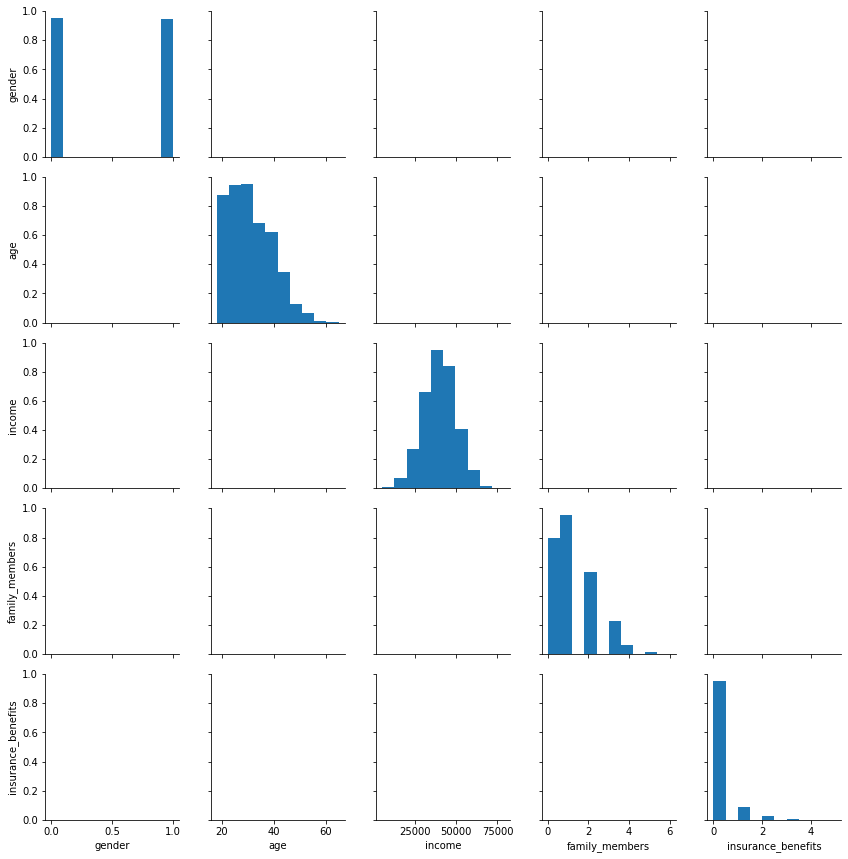

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [11]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [12]:
# def get_knn(df, n, k, metric):
    
#     """
#     Returns k nearest neighbors

#     :param df: pandas DataFrame used to find similar objects within
#     :param n: object no for which the nearest neighbours are looked for
#     :param k: the number of the nearest neighbours to return
#     :param metric: name of distance metric
#     """

#     nbrs = # <your code here> 
#     nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
#     df_res = pd.concat([
#         df.iloc[nbrs_indices[0]], 
#         pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
#         ], axis=1)
    
#     return df_res

Scaling the data.

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [14]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2156,1.0,0.353846,0.550633,0.166667,0
181,0.0,0.692308,0.513924,0.000000,1
1431,0.0,0.292308,0.182278,0.333333,0
1270,0.0,0.538462,0.583544,0.000000,0
633,0.0,0.676923,0.612658,0.500000,1


Now, let's get similar records for a given one for every combination

### K-Nearest Neighbors (k-NN)

In [15]:
point = np.array([[1, 22.0, 80000, 3, 0]])
point

array([[1.0e+00, 2.2e+01, 8.0e+04, 3.0e+00, 0.0e+00]])

#### Unscaled data

In [16]:
knn = NearestNeighbors() 
knn.fit(df)

n_array = knn.kneighbors(point)
n_array

(array([[1000.18098362, 4800.0186458 , 5200.00326923, 8400.00869047,
         8600.00145349]]),
 array([[3255, 4512, 4360, 3328, 2193]]))

##### Euclidean distance

In [17]:
distances = []

for i in range(len(n_array)):
    dist = distance.euclidean(n_array[i], point)
    distances.append(dist)
    
unscaled_euclidean_dists = sum(distances)
unscaled_euclidean_dists

151864.1480378522

##### Manhattan distance

In [18]:
distances = []

for i in range(len(n_array)):
    dist = distance.cityblock(n_array[i], point)
    distances.append(dist)
    
unscaled_manhattan_dists = sum(distances)
unscaled_manhattan_dists

186476.2065041498

#### Scaled data

In [19]:
point = df_scaled.head(1).values
point

array([[1.        , 0.63076923, 0.6278481 , 0.16666667, 0.        ]])

In [20]:
knn = NearestNeighbors() 
knn.fit(df_scaled)

n_array = knn.kneighbors(point)
n_array

(array([[0.        , 0.00632911, 0.01775386, 0.02962447, 0.03164557]]),
 array([[   0, 2689,  133, 1567, 2103]]))

##### Euclidean distance

In [21]:
distances = []

for i in range(len(n_array)):
    dist = distance.euclidean(n_array[i], point)
    distances.append(dist)
    
scaled_euclidean_dists = sum(distances)
scaled_euclidean_dists

3759.3168187810084

##### Manhattan distance

In [22]:
distances = []

for i in range(len(n_array)):
    dist = distance.cityblock(n_array[i], point)
    distances.append(dist)
    
scaled_manhattan_dists = sum(distances)
scaled_manhattan_dists

6493.9779381267535

Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 



In [23]:
scaled_dists_ratio = scaled_euclidean_dists / scaled_manhattan_dists
unscaled_dists_ratio = unscaled_euclidean_dists / unscaled_manhattan_dists

print('Unscaled distances ratio: {:.2%} \nScaled distances ratio: {:.2%}'.format(unscaled_dists_ratio, scaled_dists_ratio))
    


Unscaled distances ratio: 81.44% 
Scaled distances ratio: 57.89%


The data being not scaled does affect the kNN algorithm. As the values of our point from are bigger than its neighbors the distance increases as well.  

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

As expected, the results of the Manhattan distance metric are much bigger than the euclidean distance metric.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Sure, but the more interesting difference about scaled vs unscaled data is that if some feature has a much bigger scale than others it dominates the distance metric on unscaled data (in this case it is income), and the other features are basically disregarded. So distance-based algorithms like kNN are very sensitive to feature scales.
    
It would be nice if you printed the k nearest neighbors of some example (you can just take neighbors of the 0th row) with euclidean/manhattan distance on scaled and unscaled data to see this for yourself.
	  
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

#### Target calculation

In [24]:
# calculate the target

df.loc[df['insurance_benefits'] > 0, 'insurance_benefits_received'] = 1
df.loc[df['insurance_benefits'] == 0, 'insurance_benefits_received'] = 0
display(df.head(1))

df_scaled.loc[df['insurance_benefits'] > 0, 'insurance_benefits_received'] = 1
df_scaled.loc[df['insurance_benefits'] == 0, 'insurance_benefits_received'] = 0
display(df_scaled.head(1))

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0.0


,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1.0,0.630769,0.627848,0.166667,0,0.0


In [25]:
# check for the class imbalance with value_counts()
value_counts_series = df.insurance_benefits_received.value_counts()
display(value_counts_series/len(df) * 100)

0.0    88.72
1.0    11.28
Name: insurance_benefits_received, dtype: float64

The data isn't balaced. 

In [26]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [27]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [28]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df)) 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



In the random model, as the probabilty goes up, the F1 goes up. Maximum F1 is 0.2 .

#### Unscaled data

In [29]:
target = df.insurance_benefits_received
features = df.drop('insurance_benefits_received', axis=1)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [31]:
for k in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features_train, target_train)
    predictions = neigh.predict(features_test)
    print('k neighbors = {}:'.format(k))
    eval_classifier(target_test, predictions)
    print()

k neighbors = 1:
F1: 0.66
Confusion Matrix
[[0.87666667 0.016     ]
 [0.04666667 0.06066667]]

k neighbors = 2:
F1: 0.38
Confusion Matrix
[[0.89066667 0.002     ]
 [0.08133333 0.026     ]]

k neighbors = 3:
F1: 0.39
Confusion Matrix
[[0.88466667 0.008     ]
 [0.07933333 0.028     ]]

k neighbors = 4:
F1: 0.16
Confusion Matrix
[[0.88933333 0.00333333]
 [0.098      0.00933333]]

k neighbors = 5:
F1: 0.17
Confusion Matrix
[[0.884      0.00866667]
 [0.09666667 0.01066667]]

k neighbors = 6:
F1: 0.09
Confusion Matrix
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]

k neighbors = 7:
F1: 0.10
Confusion Matrix
[[0.89133333 0.00133333]
 [0.10133333 0.006     ]]

k neighbors = 8:
F1: 0.02
Confusion Matrix
[[0.89266667 0.        ]
 [0.106      0.00133333]]

k neighbors = 9:
F1: 0.04
Confusion Matrix
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]

k neighbors = 10:
F1: 0.04
Confusion Matrix
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]



In the unscaled data, the best F1 score is when k=1 (0.66) and decreases as k increases.

#### Scaled data

In [32]:
target = df_scaled.insurance_benefits_received
features = df_scaled.drop('insurance_benefits_received', axis=1)

In [33]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [34]:
for k in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features_train, target_train)
    predictions = neigh.predict(features_test)
    print('k neighbors = {}:'.format(k))
    eval_classifier(target_test, predictions)
    print()

k neighbors = 1:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 2:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 3:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 4:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 5:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 6:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 7:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 8:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 9:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]

k neighbors = 10:
F1: 1.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.         0.10733333]]



In the scaled data, F1 score is 1, no matter what the value of k.

#### Conclusion
The kNN classification approach does better than the dummy model.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yes, but more improtantly, you confirmed that kNN is very sensitive to scaling
	  
</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [35]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = w[1:]
        self.weights0 = w[0]
        
    def predict(self, X):
        
        # adding the unities
        #X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X.dot(self.weights) + self.weights0
        
        return y_pred

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Linear regression was implemented correctly
	  
</div>

In [80]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    r2_score = math.sqrt(abs(sklearn.metrics.r2_score(y_true, y_pred)))
    print(f'R2: {r2_score:.2f}')    

#### Unscaled data

In [37]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


#### Scaled data

In [38]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Both RMSE and R2 scores are the same. It makes sense in Linear Regression, since the scaling keeps the proportions of the data, thus we got the same result.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Not sure what you mean by 'keeps proportions of the data', I don't think that's true. Although the result that linear regression is not sensitive to scaling is correct.
    
	  
</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Mupliplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [39]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [40]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [41]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [42]:
np.linalg.inv(P)@P

array([[ 1.00000000e+00,  4.31984031e-18, -2.78054126e-16,
        -2.57000677e-16],
       [ 6.08293605e-17,  1.00000000e+00, -6.90868844e-17,
        -1.63138745e-16],
       [-5.61258920e-17,  3.19494738e-16,  1.00000000e+00,
         1.64271755e-18],
       [ 2.25584045e-18, -1.89983786e-18,  4.42459684e-17,
         1.00000000e+00]])

In [43]:
P@np.linalg.inv(P)

array([[ 1.00000000e+00,  1.85130588e-16, -2.97856902e-16,
        -3.91584367e-17],
       [ 6.23834470e-17,  1.00000000e+00, -7.10568689e-17,
         8.24459807e-17],
       [ 1.03941594e-17,  2.27454503e-17,  1.00000000e+00,
        -5.77784356e-17],
       [-1.02697151e-16, -1.69379178e-16, -2.49945035e-17,
         1.00000000e+00]])

Matrix 𝑃 is invertible.

Can you guess the customers' ages or income after the transformation?

In [44]:
trans_X = X@P
trans_X

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

No.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [45]:
recover_X = trans_X@np.linalg.inv(P)
recover_X

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

We can recover the original data from 𝑋′.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [46]:
X[0:3]

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00]])

In [47]:
trans_X[0:3]

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067]])

In [48]:
recover_X[0:3]

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13]])

You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

I guess it happens because numpy does some conversion to the original values.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
This is due to limitations of floating point arithmetic
	  
</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

As we can see below, the predicted values with $w$ and $w_P$ are same. Thus the RMSE is same. 

**Analytical proof**

$$ w = (X^T X)^{-1} X^T y $$


$$ w_P = [(XP)^T XP]^{-1} (XP)^T y $$
$$\quad \downarrow \quad$$
$$w_P = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y $$
$$\quad \downarrow \quad$$
$$w_P = P^{-1}(X^TX)^{-1}X^T y $$

$$
\hat{y} = Xw \quad \Rightarrow \quad \hat {y_P} = XPw_P \quad \Rightarrow \quad \hat {y_P} = XPP^{-1}w \quad \Rightarrow \quad \hat{y_P} = Xw
$$

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
The proof is almost correct, just one small problem: as $X$ represents the feature matrix, its number of rows (examples) is much bigger than the number of columns (features), so the matrix is not even square, and thus can't be invertible. On the other hand, $X^T X$ is always square and it's invertible as long as the columns of $X$ are linearly independent. For this reason, $(X^T X)^{-1}$ can't be simplified any further, and should be left as is.
    
Other than that, you results are correct! Indeed, $w_P = P^{-1} w$ and the predictions of the original model and the model trained on obfuscated data will be exactly the same, and thus RMSE will also be the same.
	  
</div>

<div class="alert alert-info">
  Thanks for your comment! I hope it's okay now :)
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Yep, very good!
	  
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

#### Linear Regression with original data

In [75]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
display(y_pred[0:5])
eval_regressor(y_test, y_pred)

array([ 0.17926625,  0.80931996,  0.45614337, -0.23762191,  0.4650019 ])

RMSE: 0.34
R2: 0.66


#### Linear Regression with obfuscated data

In [91]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X_train.shape[1], X_train.shape[1]))
P@np.linalg.inv(P)
obfuscated_X = X@P

X_train, X_test, y_train, y_test = train_test_split(obfuscated_X, y, test_size=0.3, random_state=12345)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
display(y_pred[0:5])
eval_regressor(y_test, y_pred)

array([ 0.17926625,  0.80931996,  0.45614337, -0.23762191,  0.4650019 ])

RMSE: 0.34
R2: 0.66


# Conclusions

Data Obfuscation doesn't change the predicted values and the RMSE, 𝑅2 metric values. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Excellent! You empirically confirmed that our data obfuscation doesn't affect the model's quality
	  
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>